In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
# Import data
X = pd.read_csv('X_stocks_vol.csv')
y = pd.read_csv('y_stocks_vol.csv', header=None)

X['Date'] = pd.to_datetime(X['Date']) # timestamp
X = X.set_index('Date') # change index
y.rename(columns={0:'Date'}, inplace=True) # rename index
y = y.set_index('Date') # change index
y.rename(columns={1:'Volume'}, inplace=True) # rename target

y.head()

,Volume
Date,
2001-10-08,726800
2001-10-09,466400
2001-10-10,665600
2001-10-11,540200
2001-10-12,353400


In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# MSE calculator for ARIMA model
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) 
    # Make train and test variables
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    test.reset_index(drop = True, inplace = True) ###
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
        
    # MSE
    error = mean_squared_error(test, predictions)
    return error

In [21]:
# Make a function to evaluate different ARIMA models with different parameters
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:

                order = (p,d,q)
                try:
                    # best MSE
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    return print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [13]:
# Values to test
p_values= [x for x in range(50)]
d_values = [x for x in range(3)]
q_values = [x for x in range(50)]

In [18]:
import warnings
#warnings.filterwarnings("ignore")

log_vol = np.log(y)

evaluate_models(log_vol, p_values, d_values, q_values) # ??

Best ARIMANone RMSE=inf


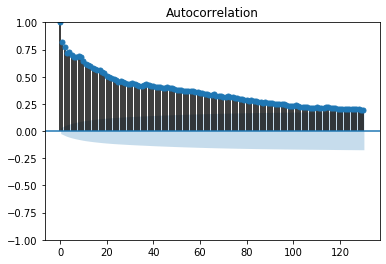

In [7]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=130); # semicolon plots single plot

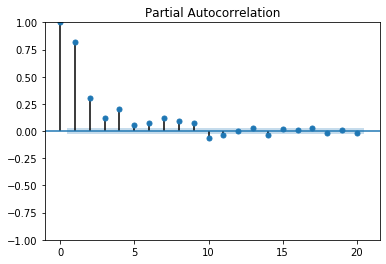

In [8]:
sm.graphics.tsa.plot_pacf(y.values.squeeze(), lags=20);

In [9]:
#pip install pmdarima
from pmdarima.arima.utils import ndiffs # d :
#ndiffs(y, test='adf') # 0

#ndiffs(y, test='kpss') # 1

#ndiffs(y, test='pp') # 0

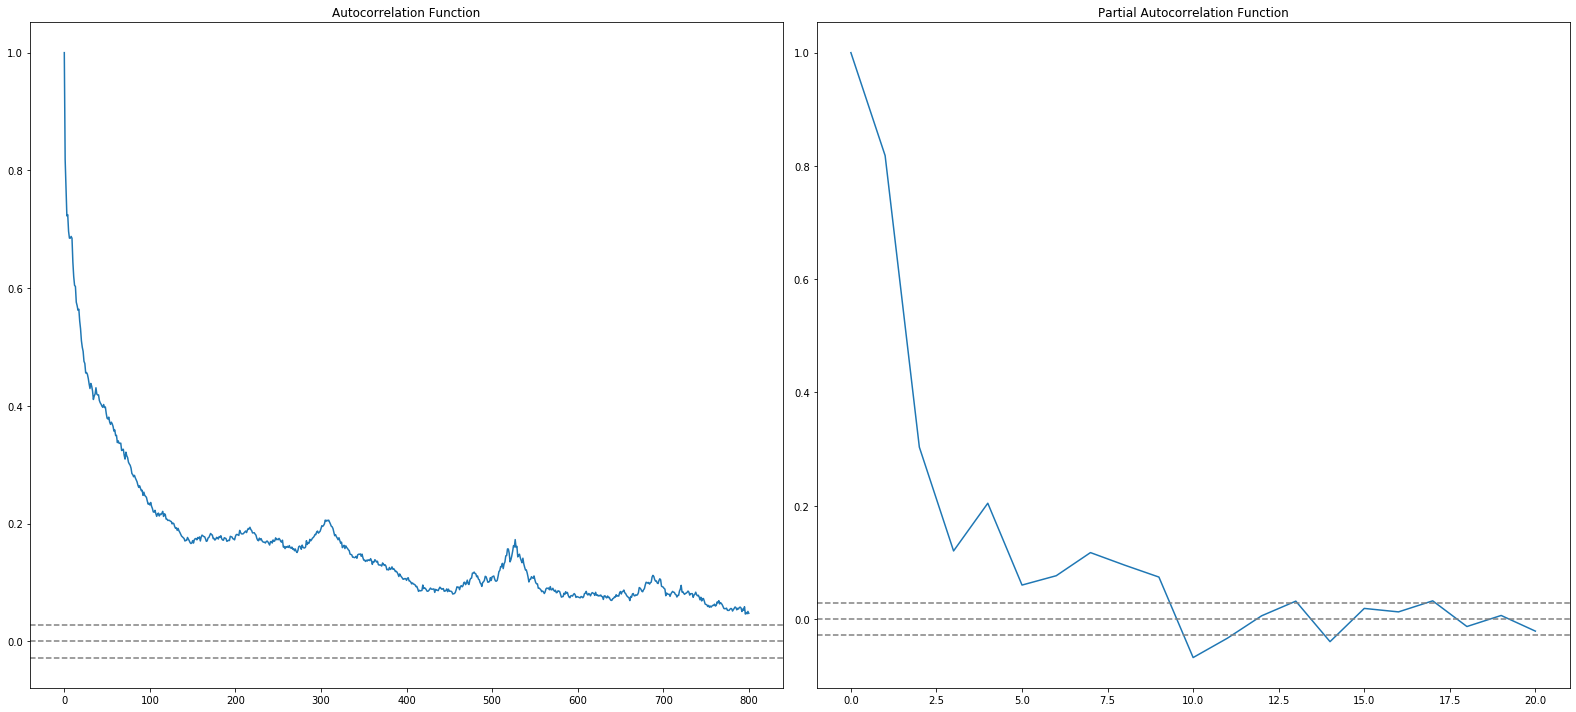

In [10]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(y, nlags=800)
lag_pacf = pacf(y, nlags=20, method='ols')


plt.figure(figsize=(22,10))
# ACF
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
import warnings
warnings.filterwarnings("ignore")

model = ARIMA(log_vol, order=(9,1,10)) #, trend='t') # 9,1,40  # 3,1,3  # d=0?
model_fit = model.fit()

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 5034
Model:                ARIMA(9, 1, 10)   Log Likelihood               -3134.629
Date:                Mon, 18 Oct 2021   AIC                           6309.258
Time:                        14:26:41   BIC                           6439.733
Sample:                             0   HQIC                          6354.972
                               - 5034                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4266      0.207     -2.058      0.040      -0.833      -0.020
ar.L2          0.1489      0.190      0.785      0.433      -0.223       0.521
ar.L3          0.2501      0.175      1.432      0.152      -0.092       0.593
ar.L4         -0.0958      0.171     -0.561      0.574      -0.430       0.238
ar.L5         -0.3184      0.174     -1.826      0.068      -0.660       0.023
ar.L6         -0.0930      0.198     -0.470      0.638      -0.481       0.295
ar.L7         -0.1909      0.165     -1.159      0.246      -0.514       0.132
ar.L8          0.0485      0.135      0.360      0.719      -0.216       0.313
ar.L9          0.4888      0.104      4.706      0.000       0.285       0.692
ma.L1         -0.2580      0.208     -1.238      0.216      -0.666       0.150
ma.L2         -0.5031      0.227     -2.221      0.026      -0.947      -0.059
ma.L3         -0.2318      0.241     -0.961      0.337      -0.705       0.241
ma.L4          0.2629      0.188      1.400      0.161      -0.105       0.631
ma.L5          0.2551      0.222      1.151      0.250      -0.179       0.689
ma.L6         -0.1506      0.234     -0.645      0.519      -0.608       0.307
ma.L7          0.0731      0.217      0.337      0.736      -0.352       0.498
ma.L8         -0.1734      0.164     -1.056      0.291      -0.495       0.148
ma.L9         -0.4526      0.154     -2.935      0.003      -0.755      -0.150
ma.L10         0.3208      0.073      4.387      0.000       0.177       0.464
sigma2         0.2039      0.003     78.252      0.000       0.199       0.209
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              3192.47
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#pip install --upgrade pandas

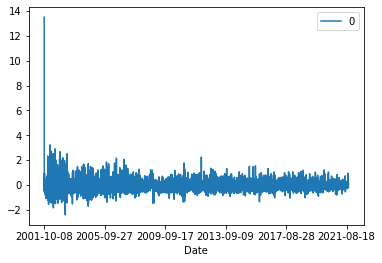

In [25]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

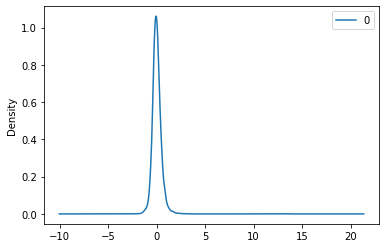

In [21]:
# density plot of residuals
residuals.plot(kind='kde')

In [16]:
residuals.describe() # mean ~ 0

,0
count,5034.000000
mean,0.003282
std,0.491656
min,-2.319079
25%,-0.267983
50%,-0.038142
75%,0.229286
max,13.496138


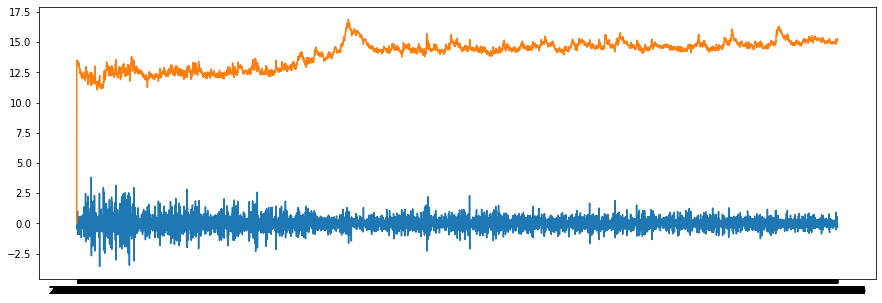

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(log_vol.diff())
plt.plot(model_fit.predict())